# 3d plots from html tables

lets use html and html to try to make a 3d plot. most plotting is an ends where the table is the means.
if we can generate plots from tabular data then we could encourage more complete tables in scientific literature.

In [1]:
%%

    shell.environment.globals.update(vars(__builtins__))

In [2]:
%%
## making sample data

create some randomized datasets with distinct clusters

    import sklearn.datasets, sklearn.discriminant_analysis, sklearn.model_selection
    features = 6
    df = pandas.DataFrame(*sklearn.datasets.make_blobs(200, features, centers=[
        (i**2,)*features for i in range(features)
    ]))

    df = pandas.concat(dict(zip("test train".split(), sklearn.model_selection.train_test_split(df))))
    df = df.rename_axis(index="selection blob".split())

apply statistical analysis to reduce the dimensionality of the data.
a sample of the full and reduced dataset are shown next, with the source as a caption.

<figure>
{{df.sample(2).style.to_html()}}
<figcaption>

    model = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components=3)
    model.fit(df.loc["test"], df.loc["test"].index)
    df = df.combine_first(
        pandas.DataFrame(model.transform(df.values), columns=list("xyz"), index=df.index)
    )
    df = pandas.concat([df, pandas.DataFrame([[-1]*features+ [0,0,0]] , pandas.MultiIndex.from_tuples([("test", -1)]), df.columns)])

</figcaption></figure>

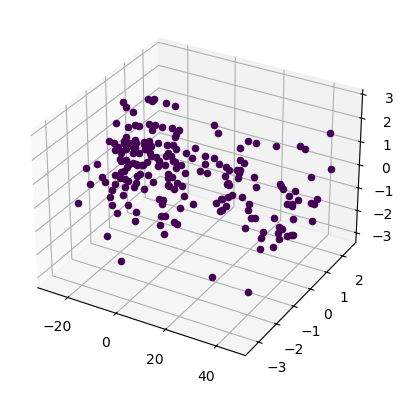

In [3]:
%%
## generate a 3d plot in an image for comparsion

we'll compare our interactive css outcomes with rendered html image.

    import matplotlib.pyplot
    fig = matplotlib.pyplot.figure()
    ax = fig.add_subplot(projection="3d")
    df[list("xyz")].apply(lambda x: ax.scatter(*x.values, c=x.name[1]), axis=1);

In [4]:
%%
## creating our table
    
    table =\
{% set format="%.2f" %}
<table role=table id=pca>
    <tbody role=rowgroup style="--x-min: {{df.x.min()}}; --x-max: {{df.x.max()}}; --y-min: {{df.y.min()}}; --y-max: {{df.y.max()}}; 
    --z-min: {{df.z.min()}}; --z-max: {{df.z.max()}};">
    {%- for i, (_, row) in enumerate(df.iterrows()) -%}
        <tr role=row style="--x: {{row.loc['x']}}; --y: {{row.loc['y']}}; --z: {{row.loc['z']}};">
        <th role=rowheader>{{i}}</th>
        {%- for j in range(features) -%}
        <td role=cell>{{format % row.loc[j]}}</td>
        {%- endfor %}{% for j in "xyz" -%}
        <td role=cell hidden>{{ row.loc[j]}}</td>
        {%- endfor %}</tr>
    {%- endfor %}</tbody>
</table>




    form =\
<form name=controls>
    <script>
    function rotate(axis, el){
        document.getElementById("pca").style.setProperty(`--rotate-${axis}`, `${el.value}deg`);
    }
    </script>
    <label>x
    <input type=range min=0 max=360 value=350 step=5 oninput="rotate('x', this)" name="x"/>
    </label>
    <label>y
    <input type=range min=0 max=360 value=5 step=5 oninput="rotate('y', this)" name="y"/>
    </label>
    <label>z
    <input type=range min=0 max=360 value=15 step=5 oninput="rotate('z', this)" name="z"/>
    </label>
    <label>show table<input type=checkbox name=show checked onchange="document.getElementById('pca-style').setAttribute('media', this.checked ? 'screen': 'none')"/></label>
</form>

<details>
<summary>html table source</summary>
 
```html
{{table}}
```

 </details>
<details>
<summary>form source</summary>


```html
{{form}}
```

 </details>


0,4.64,2.66,4.03,3.56,2.23,3.19,-15.767281376409397,-0.745360508047773,1.1279681190529915
1,-0.40,0.90,-0.06,0.89,-0.69,-0.38,-25.349022723607735,-0.02031209898608877,-0.6653164523934019
2,-0.45,0.18,-2.10,-0.38,0.54,-1.37,-27.069091141497033,0.30992648034096854,0.05707886721758662
3,16.21,17.33,15.45,17.27,15.97,15.45,19.527117740686933,-0.38040770275303176,-0.5681734311490066
4,7.53,10.52,9.06,9.56,8.66,8.73,-0.5599017558516147,0.5403181112067015,-1.744057168268122
5,0.28,-0.05,-0.24,0.08,0.02,0.21,-25.140199457802986,0.013553680838879466,0.5201735128644481
6,15.94,15.45,16.67,14.37,16.28,15.61,18.605471961865668,0.4311575976753309,0.04714403915195655
7,0.12,1.74,0.10,0.60,0.15,0.76,-23.79188354393285,0.9525895933267234,-0.2796908187752626
8,15.75,17.21,14.96,15.63,14.07,17.78,18.55750547346919,1.459732335493263,0.891115449530507
9,8.71,10.97,7.89,9.41,9.32,9.49,0.21966912131111446,1.125086655831838,-0.3497084747121219
10,24.13,25.24,25.34,24.84,23.15,26.47,43.47427939658191,0.30881987933265725,-0.04168811837734105


In [5]:
%%
## styling the table

style the table using 3d css transform, rotations, and translations.

    style =\
<style id=pca-style media=screen>
.jp-RenderedHTMLCommon tbody tr:hover {
    background: unset;
}
#pca {
    --height: 600px;
    --width: 600px;
    --depth: 600px;
    --rotate-x: 0deg;
    --rotate-y: 0deg;
    --rotate-z: 0deg;
    display: block;
    position: relative;
    width: var(--width);
    height: var(--height);
    margin-left: auto;
    margin-right: auto;
    tbody{
        perspective: .3;
        border: solid;
        position: absolute;
        display: block;
        top: 0;
        left: 0;
        width: var(--width);
        height: var(--height);
        --dx: calc(var(--x-max) - var(--x-min));
        --dy: calc(var(--y-max) - var(--y-min));
        --dz: calc(var(--z-max) - var(--z-min));
        --x-origin: calc(-1 * var(--x-min) / var(--dx) * var(--width));
        --y-origin: calc(var(--y-max) / var(--dy) * var(--height));
        transform-style: preserve-3d;
    }
    tr {        
        top: 0;
        left: 0;
        position: absolute;
        display: inline-block;
        transform-origin: var(--x-origin) var(--y-origin) 0;
        transform: 
            translateX(var(--x-origin)) translateY(var(--y-origin))
            rotateZ(calc(360deg - var(--rotate-z))) 
            rotateY(calc(360deg - var(--rotate-y)))  
            rotateX(calc(360deg - var(--rotate-x)))
            translateX(calc(var(--x) / var(--dx) * var(--width)))
            translateY(calc(-1 * var(--y) / var(--dy) * var(--height)))
            translateZ(calc(var(--z) / var(--dz) * var(--depth)))
            rotateX(var(--rotate-x)) rotateY(var(--rotate-y)) rotateZ(var(--rotate-z));
        td {
            display: none;
        }
    }
    tr:hover, tr:focus-within {
         transform: 
            translateX(var(--x-origin)) translateY(var(--y-origin))
            rotateZ(calc(360deg - var(--rotate-z))) 
            rotateY(calc(360deg - var(--rotate-y)))  
            rotateX(calc(360deg - var(--rotate-x)))
            translateX(calc(var(--x) / var(--dx) * var(--width)))
            translateY(calc(-1 * var(--y) / var(--dy) * var(--height)))
            translateZ(calc(var(--z) / var(--dz) * var(--depth)))
            rotateX(var(--rotate-x)) rotateY(var(--rotate-y)) rotateZ(var(--rotate-z))
            translateZ(10000px);
        th, td:not([hidden]) {
            display: unset;
        }
    }
    tr:last-of-type {
        background-color: red;
    }
}
</style>

    ...
<details open>
<summary>css with 3d translations, transformations, and rotations</summary>

```html
{{style}}
```

</details>


    ...;